# 训练损失可视化

该脚本用于绘制训练和验证损失曲线，帮助分析模型训练过程。

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# 设置matplotlib参数，避免中文显示问题
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)

In [10]:
# 配置文件路径
metrics_path = "/home/ma-user/work/mincycle4csp/outputs/diffcsp_cfm_cfg_20250829_165613/logs/metrics/metrics.csv"

# 读取CSV文件
print(f"Reading metrics from: {metrics_path}")
df = pd.read_csv(metrics_path)

print(f"Data shape: {df.shape}")
print("\nColumns:", df.columns.tolist())
print("\nFirst few rows:")
print(df.head())

Reading metrics from: /home/ma-user/work/mincycle4csp/outputs/diffcsp_cfm_cfg_20250829_165613/logs/metrics/metrics.csv
Data shape: (7045, 22)

Columns: ['epoch', 'lr-AdamW', 'step', 'train/coords_velocity_loss', 'train/lattice_velocity_loss', 'train/loss_epoch', 'train/loss_step', 'train/lr', 'train/original_loss', 'train/relative_error', 'train/sigma_mean', 'train/t_mean', 'val/coords_in_range', 'val/coords_velocity_loss', 'val/generated_volume', 'val/lattice_velocity_loss', 'val/loss', 'val/original_loss', 'val/relative_error', 'val/sample_mse', 'val/sigma_mean', 'val/t_mean']

First few rows:
   epoch  lr-AdamW  step  train/coords_velocity_loss  \
0    NaN   0.00001  9519                         NaN   
1    NaN   0.00001  9519                         NaN   
2   20.0       NaN  9519                         NaN   
3    NaN   0.00001  9539                         NaN   
4    NaN   0.00001  9539                         NaN   

   train/lattice_velocity_loss  train/loss_epoch  train/loss

In [11]:
# 数据预处理：过滤有效数据
# 训练数据：epoch不为空且有train/loss_step数据
train_data = df[(df['epoch'].notna()) & (df['train/loss_step'].notna())].copy()

# 验证数据：有val/loss数据
val_data = df[df['val/loss'].notna()].copy()

print(f"Training steps: {len(train_data)}")
print(f"Validation steps: {len(val_data)}")

if len(train_data) > 0:
    print(f"Training loss range: {train_data['train/loss_step'].min():.4f} - {train_data['train/loss_step'].max():.4f}")
if len(val_data) > 0:
    print(f"Validation loss range: {val_data['val/loss'].min():.4f} - {val_data['val/loss'].max():.4f}")

Training steps: 2251
Validation steps: 194
Training loss range: 0.8427 - 1.8485
Validation loss range: 1.0747 - 1.3387


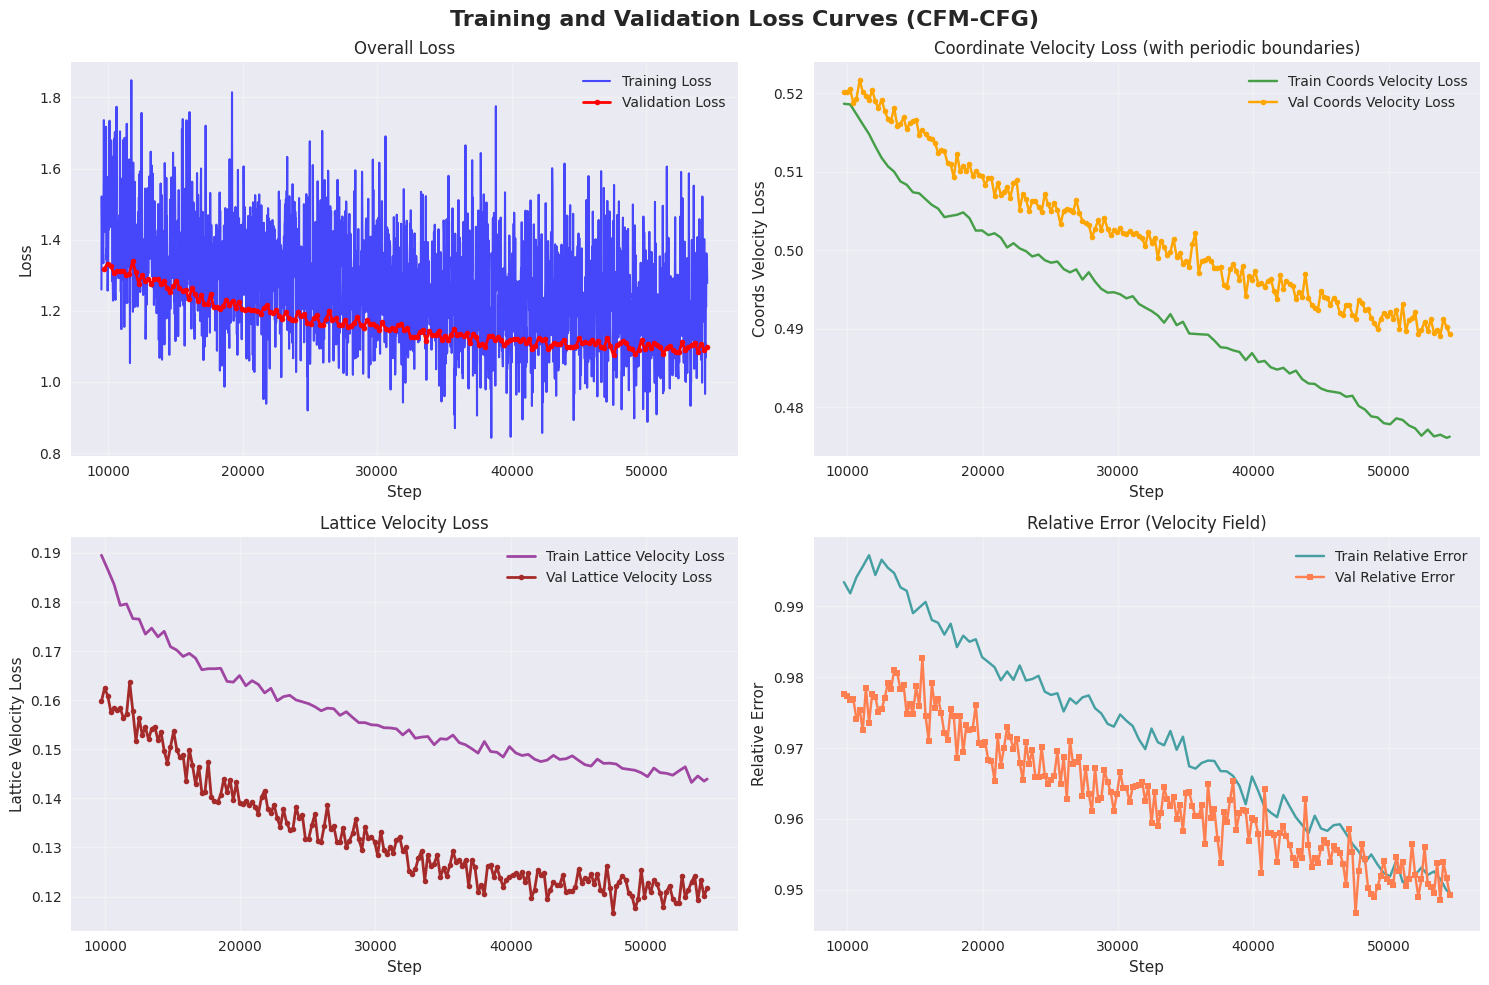

In [12]:
# 创建损失曲线图 - 更新以匹配 cfm_cfg.py 的实际指标
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Training and Validation Loss Curves (CFM-CFG)', fontsize=16, fontweight='bold')

# 1. 总体损失曲线
ax1 = axes[0, 0]
if len(train_data) > 0:
    ax1.plot(train_data['step'], train_data['train/loss_step'], 
             label='Training Loss', color='blue', alpha=0.7, linewidth=1.5)
if len(val_data) > 0:
    ax1.plot(val_data['step'], val_data['val/loss'], 
             label='Validation Loss', color='red', marker='o', markersize=4, linewidth=2)

ax1.set_xlabel('Step')
ax1.set_ylabel('Loss')
ax1.set_title('Overall Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. 坐标速度损失 (coords_velocity_loss) - 匹配 cfm_cfg.py 的实际指标名称
ax2 = axes[0, 1]
train_coords_vel = df[df['train/coords_velocity_loss'].notna()]
val_coords_vel = df[df['val/coords_velocity_loss'].notna()]

if len(train_coords_vel) > 0:
    ax2.plot(train_coords_vel['step'], train_coords_vel['train/coords_velocity_loss'], 
             label='Train Coords Velocity Loss', color='green', alpha=0.7)
if len(val_coords_vel) > 0:
    ax2.plot(val_coords_vel['step'], val_coords_vel['val/coords_velocity_loss'], 
             label='Val Coords Velocity Loss', color='orange', marker='o', markersize=4)

ax2.set_xlabel('Step')
ax2.set_ylabel('Coords Velocity Loss')
ax2.set_title('Coordinate Velocity Loss (with periodic boundaries)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. 晶格速度损失 (lattice_velocity_loss) - 匹配 cfm_cfg.py 的实际指标名称
ax3 = axes[1, 0]
train_lattice_vel = df[df['train/lattice_velocity_loss'].notna()]
val_lattice_vel = df[df['val/lattice_velocity_loss'].notna()]

if len(train_lattice_vel) > 0:
    ax3.plot(train_lattice_vel['step'], train_lattice_vel['train/lattice_velocity_loss'], 
             label='Train Lattice Velocity Loss', color='purple', alpha=0.7, linewidth=2)
if len(val_lattice_vel) > 0:
    ax3.plot(val_lattice_vel['step'], val_lattice_vel['val/lattice_velocity_loss'], 
             label='Val Lattice Velocity Loss', color='brown', marker='o', markersize=4, linewidth=2)

ax3.set_xlabel('Step')
ax3.set_ylabel('Lattice Velocity Loss')
ax3.set_title('Lattice Velocity Loss')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. 相对误差和其他诊断指标
ax4 = axes[1, 1]

# 检查是否有相对误差数据
train_rel_error = df[df['train/relative_error'].notna()]
val_rel_error = df[df['val/relative_error'].notna()]

if len(train_rel_error) > 0 or len(val_rel_error) > 0:
    # 绘制相对误差
    if len(train_rel_error) > 0:
        ax4.plot(train_rel_error['step'], train_rel_error['train/relative_error'], 
                 label='Train Relative Error', color='teal', alpha=0.7)
    if len(val_rel_error) > 0:
        ax4.plot(val_rel_error['step'], val_rel_error['val/relative_error'], 
                 label='Val Relative Error', color='coral', marker='s', markersize=4)
    
    ax4.set_xlabel('Step')
    ax4.set_ylabel('Relative Error')
    ax4.set_title('Relative Error (Velocity Field)')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
else:
    # 如果没有相对误差，显示学习率
    lr_data = df[df['train/lr'].notna()]
    if len(lr_data) > 0:
        ax4.plot(lr_data['step'], lr_data['train/lr'], 
                 label='Learning Rate', color='red', linewidth=2)
        ax4.set_xlabel('Step')
        ax4.set_ylabel('Learning Rate')
        ax4.set_title('Learning Rate Schedule')
        ax4.set_yscale('log')
        ax4.grid(True, alpha=0.3)
    else:
        ax4.text(0.5, 0.5, 'No Additional Metrics', 
                 horizontalalignment='center', verticalalignment='center', 
                 transform=ax4.transAxes, fontsize=12)

plt.tight_layout()
plt.show()

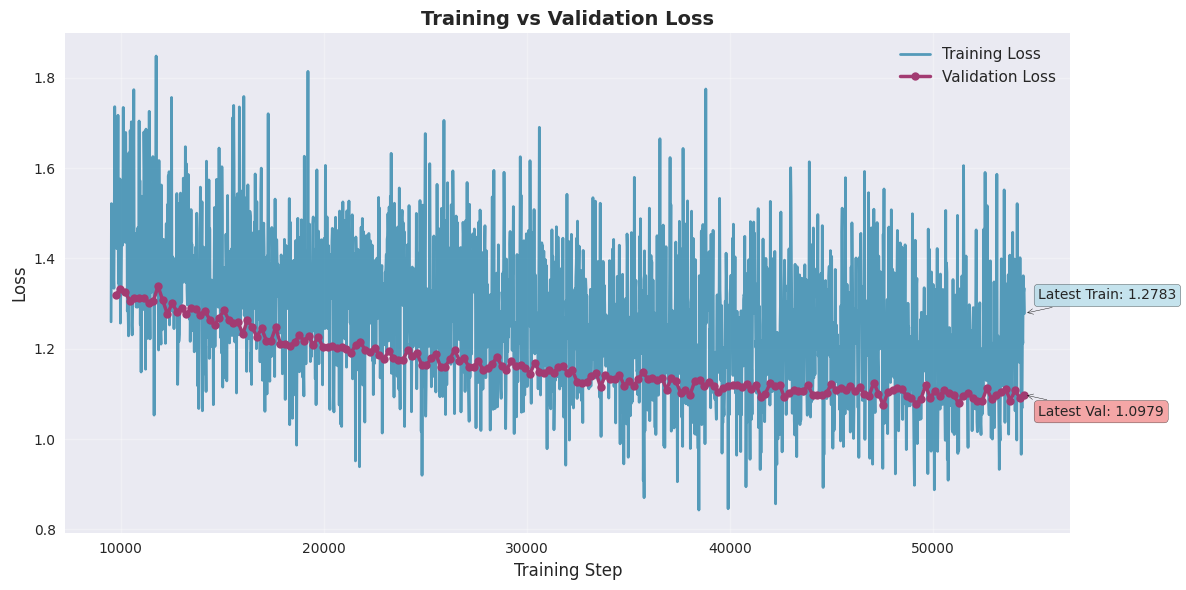

In [13]:
# 创建单独的损失对比图
plt.figure(figsize=(12, 6))

# 绘制训练和验证损失的对比
if len(train_data) > 0:
    plt.plot(train_data['step'], train_data['train/loss_step'], 
             label='Training Loss', color='#2E86AB', linewidth=2, alpha=0.8)

if len(val_data) > 0:
    plt.plot(val_data['step'], val_data['val/loss'], 
             label='Validation Loss', color='#A23B72', 
             marker='o', markersize=6, linewidth=2.5)

plt.xlabel('Training Step', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training vs Validation Loss', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# 添加最新损失值注释
if len(train_data) > 0:
    latest_train_loss = train_data['train/loss_step'].iloc[-1]
    latest_train_step = train_data['step'].iloc[-1]
    plt.annotate(f'Latest Train: {latest_train_loss:.4f}', 
                xy=(latest_train_step, latest_train_loss), 
                xytext=(10, 10), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.7),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

if len(val_data) > 0:
    latest_val_loss = val_data['val/loss'].iloc[-1]
    latest_val_step = val_data['step'].iloc[-1]
    plt.annotate(f'Latest Val: {latest_val_loss:.4f}', 
                xy=(latest_val_step, latest_val_loss), 
                xytext=(10, -15), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='lightcoral', alpha=0.7),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.tight_layout()
plt.show()

In [14]:
# 训练统计信息 - 更新以包含速度损失分量
print("=== Training Statistics (CFM-CFG) ===")
if len(train_data) > 0:
    print(f"Total training steps: {len(train_data)}")
    print(f"Training loss - Min: {train_data['train/loss_step'].min():.6f}")
    print(f"Training loss - Max: {train_data['train/loss_step'].max():.6f}")
    print(f"Training loss - Final: {train_data['train/loss_step'].iloc[-1]:.6f}")
    print(f"Training loss - Mean: {train_data['train/loss_step'].mean():.6f}")
    
    # 添加速度损失分量统计
    if 'train/lattice_velocity_loss' in train_data.columns:
        lattice_vel_data = train_data[train_data['train/lattice_velocity_loss'].notna()]
        if len(lattice_vel_data) > 0:
            print(f"\nLattice Velocity Loss:")
            print(f"  - Final: {lattice_vel_data['train/lattice_velocity_loss'].iloc[-1]:.6f}")
            print(f"  - Mean: {lattice_vel_data['train/lattice_velocity_loss'].mean():.6f}")
    
    if 'train/coords_velocity_loss' in train_data.columns:
        coords_vel_data = train_data[train_data['train/coords_velocity_loss'].notna()]
        if len(coords_vel_data) > 0:
            print(f"\nCoords Velocity Loss:")
            print(f"  - Final: {coords_vel_data['train/coords_velocity_loss'].iloc[-1]:.6f}")
            print(f"  - Mean: {coords_vel_data['train/coords_velocity_loss'].mean():.6f}")

print("\n=== Validation Statistics ===")
if len(val_data) > 0:
    print(f"Total validation steps: {len(val_data)}")
    print(f"Validation loss - Min: {val_data['val/loss'].min():.6f}")
    print(f"Validation loss - Max: {val_data['val/loss'].max():.6f}")
    print(f"Validation loss - Final: {val_data['val/loss'].iloc[-1]:.6f}")
    print(f"Validation loss - Mean: {val_data['val/loss'].mean():.6f}")
    
    # 添加验证速度损失分量
    if 'val/lattice_velocity_loss' in val_data.columns:
        val_lattice_vel = val_data[val_data['val/lattice_velocity_loss'].notna()]
        if len(val_lattice_vel) > 0:
            print(f"\nValidation Lattice Velocity Loss:")
            print(f"  - Final: {val_lattice_vel['val/lattice_velocity_loss'].iloc[-1]:.6f}")
    
    if 'val/coords_velocity_loss' in val_data.columns:
        val_coords_vel = val_data[val_data['val/coords_velocity_loss'].notna()]
        if len(val_coords_vel) > 0:
            print(f"\nValidation Coords Velocity Loss:")
            print(f"  - Final: {val_coords_vel['val/coords_velocity_loss'].iloc[-1]:.6f}")

# 检查是否存在过拟合趋势
if len(train_data) > 0 and len(val_data) > 0:
    print("\n=== Overfitting Analysis ===")
    final_train_loss = train_data['train/loss_step'].iloc[-1]
    final_val_loss = val_data['val/loss'].iloc[-1]
    gap = final_val_loss - final_train_loss
    print(f"Final loss gap (val - train): {gap:.6f}")
    
    # 根据损失权重调整过拟合阈值判断
    if gap > 0.5:
        print("⚠️  Warning: Large validation-training gap suggests possible overfitting")
    elif gap < 0:
        print("ℹ️  Info: Validation loss lower than training loss (normal in some cases)")
    else:
        print("✅ Good: Reasonable validation-training gap")
    
    # 分析损失权重比例
    print("\n=== Loss Weight Analysis ===")
    print("According to cfm_cfg.py configuration:")
    print("  - Lattice weight: 1.0")
    print("  - Coords weight: 1.0")
    print("  - Invariant weight: 0.01 (if enabled)")

=== Training Statistics (CFM-CFG) ===
Total training steps: 2251
Training loss - Min: 0.842653
Training loss - Max: 1.848493
Training loss - Final: 1.278341
Training loss - Mean: 1.275002

=== Validation Statistics ===
Total validation steps: 194
Validation loss - Min: 1.074687
Validation loss - Max: 1.338655
Validation loss - Final: 1.097855
Validation loss - Mean: 1.164321

Validation Lattice Velocity Loss:
  - Final: 0.121706

Validation Coords Velocity Loss:
  - Final: 0.489327

=== Overfitting Analysis ===
Final loss gap (val - train): -0.180486
ℹ️  Info: Validation loss lower than training loss (normal in some cases)

=== Loss Weight Analysis ===
According to cfm_cfg.py configuration:
  - Lattice weight: 1.0
  - Coords weight: 1.0
  - Invariant weight: 0.01 (if enabled)


Loss curve saved to: /home/ma-user/work/mincycle4csp/scripts/plots/loss_curves.png


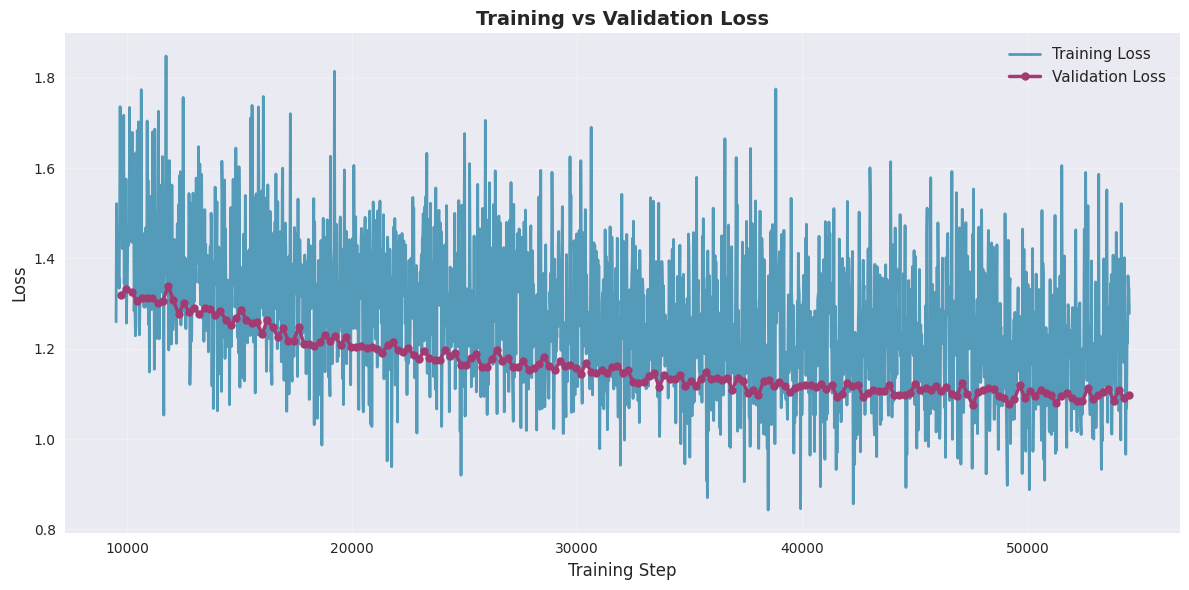

In [15]:
# 可选：保存图片
save_plots = True  # 设置为True以保存图片

if save_plots:
    output_dir = Path("/home/ma-user/work/mincycle4csp/scripts/plots")
    output_dir.mkdir(exist_ok=True)
    
    # 重新生成并保存主要的损失对比图
    plt.figure(figsize=(12, 6))
    
    if len(train_data) > 0:
        plt.plot(train_data['step'], train_data['train/loss_step'], 
                 label='Training Loss', color='#2E86AB', linewidth=2, alpha=0.8)
    
    if len(val_data) > 0:
        plt.plot(val_data['step'], val_data['val/loss'], 
                 label='Validation Loss', color='#A23B72', 
                 marker='o', markersize=6, linewidth=2.5)
    
    plt.xlabel('Training Step', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.title('Training vs Validation Loss', fontsize=14, fontweight='bold')
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    plot_path = output_dir / "loss_curves.png"
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    print(f"Loss curve saved to: {plot_path}")
    plt.show()

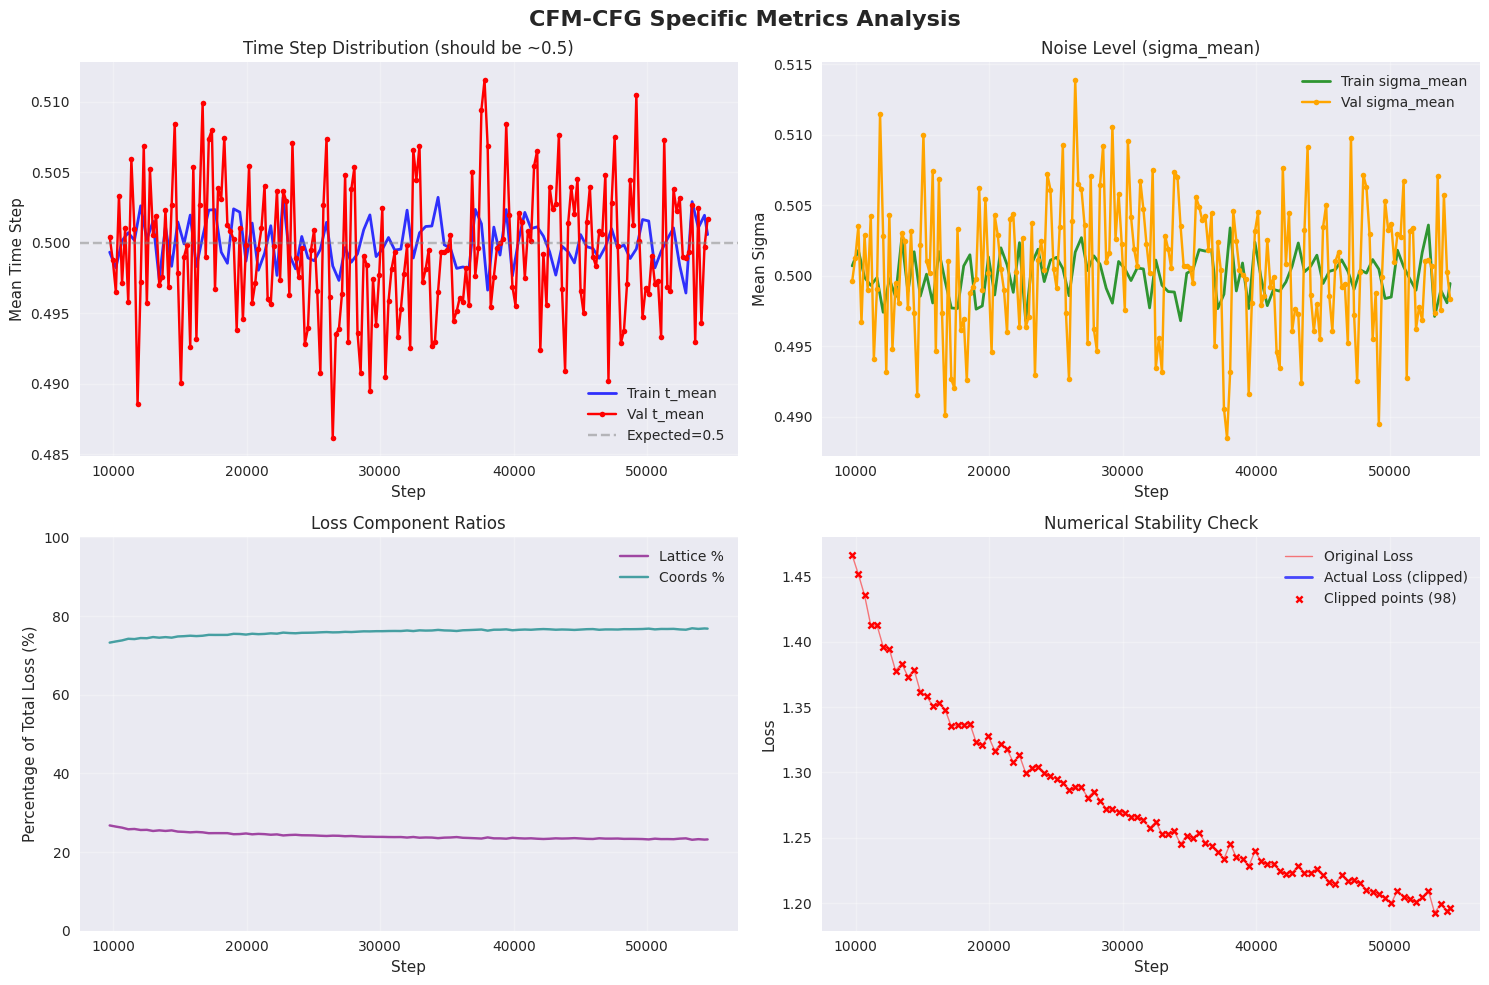


=== CFM-CFG Specific Statistics ===
Time step mean (should be ~0.5): 0.5000
Sigma mean: 0.5000

=== Numerical Stability Report ===
Loss clipping events (>100): 0
NaN losses: 0
Inf losses: 0
✅ Good: No numerical instabilities detected


In [16]:
# CFM-CFG 特定指标分析
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('CFM-CFG Specific Metrics Analysis', fontsize=16, fontweight='bold')

# 1. 时间步分布 (t_mean) - 监控采样的时间步分布
ax1 = axes[0, 0]
train_t = df[df['train/t_mean'].notna()]
val_t = df[df['val/t_mean'].notna()]

if len(train_t) > 0:
    ax1.plot(train_t['step'], train_t['train/t_mean'], 
             color='blue', linewidth=2, alpha=0.8, label='Train t_mean')
if len(val_t) > 0:
    ax1.plot(val_t['step'], val_t['val/t_mean'], 
             color='red', marker='o', markersize=4, label='Val t_mean')

ax1.set_xlabel('Step')
ax1.set_ylabel('Mean Time Step')
ax1.set_title('Time Step Distribution (should be ~0.5)')
ax1.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5, label='Expected=0.5')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. 噪声水平 (sigma_mean) - 监控噪声强度
ax2 = axes[0, 1]
train_sigma = df[df['train/sigma_mean'].notna()]
val_sigma = df[df['val/sigma_mean'].notna()]

if len(train_sigma) > 0:
    ax2.plot(train_sigma['step'], train_sigma['train/sigma_mean'], 
             color='green', linewidth=2, alpha=0.8, label='Train sigma_mean')
if len(val_sigma) > 0:
    ax2.plot(val_sigma['step'], val_sigma['val/sigma_mean'], 
             color='orange', marker='o', markersize=4, label='Val sigma_mean')

ax2.set_xlabel('Step')
ax2.set_ylabel('Mean Sigma')
ax2.set_title('Noise Level (sigma_mean)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. 损失分量比例分析
ax3 = axes[1, 0]
if 'train/lattice_velocity_loss' in df.columns and 'train/coords_velocity_loss' in df.columns:
    train_with_components = df[(df['train/lattice_velocity_loss'].notna()) & 
                               (df['train/coords_velocity_loss'].notna())].copy()
    
    if len(train_with_components) > 0:
        # 计算损失比例
        total_loss = (train_with_components['train/lattice_velocity_loss'] + 
                     train_with_components['train/coords_velocity_loss'])
        lattice_ratio = train_with_components['train/lattice_velocity_loss'] / (total_loss + 1e-6)
        coords_ratio = train_with_components['train/coords_velocity_loss'] / (total_loss + 1e-6)
        
        ax3.plot(train_with_components['step'], lattice_ratio * 100, 
                 label='Lattice %', color='purple', alpha=0.7)
        ax3.plot(train_with_components['step'], coords_ratio * 100, 
                 label='Coords %', color='teal', alpha=0.7)
        ax3.set_xlabel('Step')
        ax3.set_ylabel('Percentage of Total Loss (%)')
        ax3.set_title('Loss Component Ratios')
        ax3.set_ylim([0, 100])
        ax3.legend()
        ax3.grid(True, alpha=0.3)
else:
    ax3.text(0.5, 0.5, 'Loss components not available', 
             horizontalalignment='center', verticalalignment='center', 
             transform=ax3.transAxes, fontsize=12)

# 4. 原始损失 vs 截断损失对比（用于检测数值稳定性问题）
ax4 = axes[1, 1]
train_original = df[df['train/original_loss'].notna()]
if len(train_original) > 0:
    # 找出被截断的损失点
    truncated_mask = train_original['train/original_loss'] != train_original['train/loss_step']
    truncated_points = train_original[truncated_mask]
    
    ax4.plot(train_original['step'], train_original['train/original_loss'], 
             color='red', alpha=0.5, linewidth=1, label='Original Loss')
    ax4.plot(train_original['step'], train_original['train/loss_step'], 
             color='blue', alpha=0.7, linewidth=2, label='Actual Loss (clipped)')
    
    if len(truncated_points) > 0:
        ax4.scatter(truncated_points['step'], truncated_points['train/original_loss'], 
                   color='red', s=20, marker='x', label=f'Clipped points ({len(truncated_points)})')
    
    ax4.set_xlabel('Step')
    ax4.set_ylabel('Loss')
    ax4.set_title('Numerical Stability Check')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    # 如果有很高的原始损失，使用log scale
    if train_original['train/original_loss'].max() > 10:
        ax4.set_yscale('log')
else:
    ax4.text(0.5, 0.5, 'Original loss tracking not available', 
             horizontalalignment='center', verticalalignment='center', 
             transform=ax4.transAxes, fontsize=12)

plt.tight_layout()
plt.show()

# 打印 CFM-CFG 特定统计
print("\n=== CFM-CFG Specific Statistics ===")
if len(train_t) > 0:
    print(f"Time step mean (should be ~0.5): {train_t['train/t_mean'].mean():.4f}")
if len(train_sigma) > 0:
    print(f"Sigma mean: {train_sigma['train/sigma_mean'].mean():.4f}")

# 检查数值稳定性
if 'train/original_loss' in df.columns:
    original_loss_data = df[df['train/original_loss'].notna()]
    if len(original_loss_data) > 0:
        clipped_count = (original_loss_data['train/original_loss'] > 100.0).sum()
        nan_count = original_loss_data['train/original_loss'].isna().sum()
        inf_count = np.isinf(original_loss_data['train/original_loss'].values).sum()
        
        print(f"\n=== Numerical Stability Report ===")
        print(f"Loss clipping events (>100): {clipped_count}")
        print(f"NaN losses: {nan_count}")
        print(f"Inf losses: {inf_count}")
        
        if clipped_count > 0 or nan_count > 0 or inf_count > 0:
            print("⚠️  Warning: Numerical instabilities detected during training")
        else:
            print("✅ Good: No numerical instabilities detected")

## 解读CFM-CFG损失指标

### 主要损失组成部分：
1. **lattice_velocity_loss**: 晶格参数的速度场预测损失（3×3矩阵）
2. **coords_velocity_loss**: 分数坐标的速度场预测损失（考虑周期性边界）
3. **总损失**: `loss = weight_lattice * lattice_loss + weight_coords * coords_loss`

### 关键监控指标：
- **t_mean**: 应该接近0.5，表示时间步采样均匀
- **sigma_mean**: 噪声水平，从sigma_max到sigma_min线性变化
- **relative_error**: 速度场预测的相对误差
- **original_loss vs loss**: 检测数值稳定性问题

### 期望行为：
- 损失应该稳定下降
- 验证损失不应该显著高于训练损失
- 晶格和坐标损失应该保持相对平衡的比例